# Import all dependencies and libraries

In [558]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Transform source data to csv

In [559]:
# Importing library
import os

# Getting all the arff files from the current directory
files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]

# Function for converting arff list to csv list
def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

# Main loop for reading and writing files
for file in files:
    with open(file , "r") as inFile:
        content = inFile.readlines()
        name,ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name+".csv", "w") as outFile:
            outFile.writelines(new)

# Import data visualize data

In [560]:
import pandas as pd 
df = pd.read_csv("Behavior of the urban traffic - modified.csv") 

In [561]:
df.head()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,T,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [562]:
df.tail()

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
135,18:00,1.0,0.0,F,0.0,1.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.8
136,18:30,0.0,0.0,F,2.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,18.1
137,19:00,1.0,0.0,F,2.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,17.7
138,19:30,0.0,4.0,F,,0.0,NO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17.4
139,20:00,0.0,0.0,F,0.0,0.0,NO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.1


In [563]:
df.shape

(140, 18)

In [564]:
df.dtypes

Hour                                      object
Immobilized_bus                          float64
Broken_Truck                             float64
Vehicle_excess                            object
Accident_victim                           object
Running_over                              object
Fire_vehicles                             object
Occurrence_involving_freight             float64
Incident_involving_dangerous_freight      object
Lack_of_electricity                      float64
Fire                                     float64
Point_of_flooding                        float64
Manifestations                           float64
Defect_in_the_network_of_trolleybuses     object
Tree_on_the_road                         float64
Semaphore_off                             object
Intermittent_Semaphore                   float64
Slowness_in_traffic_percent              float64
dtype: object

# Data Cleansing 

Check unique values for the given column to understand nature of data (Categorical/Numerical) and missing/empty rows, NA values etc. We will try to fill missing/empty/NA values discard rows and create columns for categorical variables.

#### Exploratory Analysis for Hour

In [565]:
print(df.Hour.unique())

['7:00' '7:30' '8:00' '8:30' '9:00' '9:30' '10:00' '10:30' '11:00' '11:30'
 '12:00' '12:30' '13:00' '13:30' '14:00' '14:30' '15:00' '15:30' '16:00'
 '16:30' '17:00' '17:30' '18:00' '18:30' '19:00' '19:30' '20:00']


In [566]:
print(df['Hour'].isnull().sum())
print(df['Hour'].empty)

0
False


#### Exploratory Analysis for Immobilized_bus feature

In [567]:
print(df.Immobilized_bus.unique())
print(df['Immobilized_bus'].value_counts(dropna=False))

[0. 2. 1. 4.]
0.0    104
1.0     27
2.0      8
4.0      1
Name: Immobilized_bus, dtype: int64


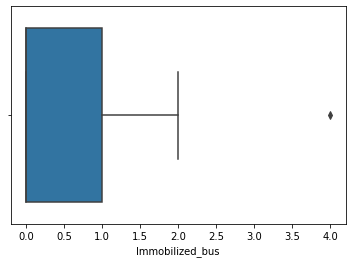

In [568]:
sns.boxplot('Immobilized_bus', data = df)

In [569]:
df['Immobilized_bus_zero'] = [1 if x ==0.0 else 0 for x in df['Immobilized_bus']]
print(df['Immobilized_bus_zero'].value_counts(dropna=False))

1    104
0     36
Name: Immobilized_bus_zero, dtype: int64


In [570]:
df['Immobilized_bus_one'] = [1 if x ==1.0 else 0 for x in df['Immobilized_bus']]
print(df['Immobilized_bus_one'].value_counts(dropna=False))

0    113
1     27
Name: Immobilized_bus_one, dtype: int64


In [571]:
df['Immobilized_bus_twoOrMore'] = [1 if x >1.0 else 0 for x in df['Immobilized_bus']]
print(df['Immobilized_bus_twoOrMore'].value_counts(dropna=False))

0    131
1      9
Name: Immobilized_bus_twoOrMore, dtype: int64


In [572]:
df.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore'],
      dtype='object')

#### Exploratory Analysis for Broken_Truck feature

In [573]:
print(df.Broken_Truck.unique())
print(df['Broken_Truck'].value_counts(dropna=False))

[   0. 1000.    2.    1.    5.    4.    3.]
0.0       66
1.0       44
2.0       17
3.0        6
4.0        5
5.0        1
1000.0     1
Name: Broken_Truck, dtype: int64


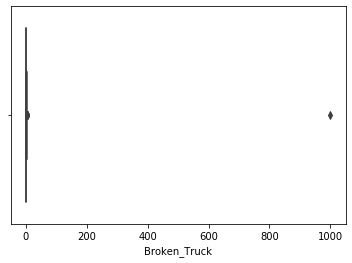

In [574]:
sns.boxplot('Broken_Truck', data = df)

In [575]:
df.loc[(df.Broken_Truck ==1000.0),'Broken_Truck']=0.0

In [576]:
df['Broken_Truck_zero'] = [1 if x ==0.0 else 0 for x in df['Broken_Truck']]
print(df['Broken_Truck_zero'].value_counts(dropna=False))

0    73
1    67
Name: Broken_Truck_zero, dtype: int64


In [577]:
df['Broken_Truck_one'] = [1 if x ==1.0 else 0 for x in df['Broken_Truck']]
print(df['Broken_Truck_one'].value_counts(dropna=False))

0    96
1    44
Name: Broken_Truck_one, dtype: int64


In [578]:
df['Broken_Truck_twoOrMore'] = [1 if x >1.0 else 0 for x in df['Broken_Truck']]
print(df['Broken_Truck_twoOrMore'].value_counts(dropna=False))

0    111
1     29
Name: Broken_Truck_twoOrMore, dtype: int64


In [579]:
df.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore', 'Broken_Truck_zero',
       'Broken_Truck_one', 'Broken_Truck_twoOrMore'],
      dtype='object')

#### Exploratory Analysis for Vehicle_excess feature

In [580]:
df.Vehicle_excess.unique()
df.loc[(df.Vehicle_excess == ' f'),'Vehicle_excess']=' F'
df.Vehicle_excess.unique()

array([' T', ' F'], dtype=object)

In [581]:
# Converting Yes to 1 and No to 0
df['Vehicle_excess'] = df['Vehicle_excess'].map({' T': 1, ' F': 0})
df.Vehicle_excess.unique()

array([1, 0])

In [582]:
#print(df['Vehicle_excess'])
print(df['Vehicle_excess'].value_counts(dropna=False))

0    135
1      5
Name: Vehicle_excess, dtype: int64


#### Exploratory Analysis for Accident_victim feature

In [583]:
df.Accident_victim.unique()

array([' 0.0', ' 1.0', ' 2.0', ' 3.0', ' -0.0', ' '], dtype=object)

In [584]:
df.loc[(df.Accident_victim == ' -0.0'),'Accident_victim']=' 0.0'
print(df['Accident_victim'].value_counts(dropna=False))

 0.0    92
 1.0    33
 2.0    10
 3.0     3
         2
Name: Accident_victim, dtype: int64


In [585]:
df['Accident_victim'] = pd.to_numeric(df['Accident_victim'],errors='coerce')
print(df.Accident_victim.unique())
print(df['Accident_victim'].mean())
print(df['Accident_victim'].mode())

[ 0.  1.  2.  3. nan]
0.4492753623188406
0    0.0
dtype: float64


In [586]:
#Replace nan with mode
df['Accident_victim'].replace(np.nan, 0.0 , inplace = True)

In [587]:
df['Accident_victim'] = pd.to_numeric(df['Accident_victim'],errors='coerce')

In [588]:
print(df['Accident_victim'].value_counts(dropna=False))

0.0    94
1.0    33
2.0    10
3.0     3
Name: Accident_victim, dtype: int64


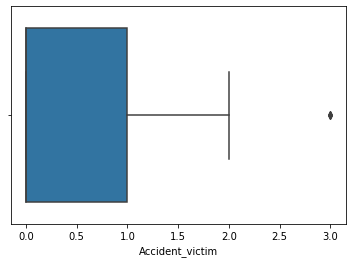

In [589]:
sns.boxplot('Accident_victim', data = df)

In [590]:
df['Accident_victim_zero'] = [1 if x ==0.0 else 0 for x in df['Accident_victim']]
print(df['Accident_victim_zero'].value_counts(dropna=False))

1    94
0    46
Name: Accident_victim_zero, dtype: int64


In [591]:
df['Accident_victim_one'] = [1 if x ==1.0 else 0 for x in df['Accident_victim']]
print(df['Accident_victim_one'].value_counts(dropna=False))

0    107
1     33
Name: Accident_victim_one, dtype: int64


In [592]:
df['Accident_victim_twoOrMore'] = [1 if x >1.0 else 0 for x in df['Accident_victim']]
print(df['Accident_victim_twoOrMore'].value_counts(dropna=False))

0    127
1     13
Name: Accident_victim_twoOrMore, dtype: int64


In [593]:
df.columns

Index(['Hour', 'Immobilized_bus', 'Broken_Truck', 'Vehicle_excess',
       'Accident_victim', 'Running_over', 'Fire_vehicles',
       'Occurrence_involving_freight', 'Incident_involving_dangerous_freight',
       'Lack_of_electricity', 'Fire', 'Point_of_flooding', 'Manifestations',
       'Defect_in_the_network_of_trolleybuses', 'Tree_on_the_road',
       'Semaphore_off', 'Intermittent_Semaphore',
       'Slowness_in_traffic_percent', 'Immobilized_bus_zero',
       'Immobilized_bus_one', 'Immobilized_bus_twoOrMore', 'Broken_Truck_zero',
       'Broken_Truck_one', 'Broken_Truck_twoOrMore', 'Accident_victim_zero',
       'Accident_victim_one', 'Accident_victim_twoOrMore'],
      dtype='object')

#### Exploratory Analysis for Running_over feature

In [594]:
print(df.Running_over.unique())
df.loc[(df.Running_over == ' NO'),'Running_over']=' 0.0'
df.loc[(df.Running_over == ' -1.0'),'Running_over']=' 1.0'

[' 0.0' ' NO' ' 1.0' ' 2.0' ' -1.0']


In [595]:
print(df.Running_over.unique())
print(df['Running_over'].value_counts(dropna=False))

[' 0.0' ' 1.0' ' 2.0']
 0.0    125
 1.0     14
 2.0      1
Name: Running_over, dtype: int64


In [596]:
df['Running_over'] = pd.to_numeric(df['Running_over'],errors='coerce')

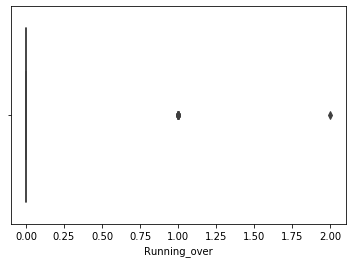

In [597]:
sns.boxplot('Running_over', data = df)

In [598]:
df.loc[(df.Running_over == 2.0),'Running_over']=0.0
print(df['Running_over'].value_counts(dropna=False))

0.0    126
1.0     14
Name: Running_over, dtype: int64


#### Exploratory Analysis for Fire_vehicles feature

In [599]:
print(df.Fire_vehicles.unique())
print(df['Fire_vehicles'].value_counts(dropna=False))

[' NO' ' 0.0' ' YES']
 NO     138
 YES      1
 0.0      1
Name: Fire_vehicles, dtype: int64


In [600]:
#df.replace(to_replace=' 0.0', value= ' NO', inplace = True)
df.loc[(df.Fire_vehicles == ' 0.0'),'Fire_vehicles']=' NO'
print(df['Fire_vehicles'].value_counts(dropna=False))

 NO     139
 YES      1
Name: Fire_vehicles, dtype: int64


In [601]:
df.loc[(df.Fire_vehicles == ' NO'),'Fire_vehicles']=' 0.0'
df.loc[(df.Fire_vehicles == ' YES'),'Fire_vehicles']=' 1.0'

In [602]:
df['Fire_vehicles'] = pd.to_numeric(df['Fire_vehicles'],errors='coerce')
print(df['Fire_vehicles'].value_counts(dropna=False))

0.0    139
1.0      1
Name: Fire_vehicles, dtype: int64


#### Exploratory Analysis for Occurrence_involving_freight feature

In [603]:
df.Occurrence_involving_freight.unique()
#print(df['Occurrence_involving_freight'])
print(df['Occurrence_involving_freight'].value_counts(dropna=False))

0.0    139
1.0      1
Name: Occurrence_involving_freight, dtype: int64


In [604]:
df['Occurrence_involving_freight'] = pd.to_numeric(df['Occurrence_involving_freight'],errors='coerce')
print(df['Occurrence_involving_freight'].value_counts(dropna=False))

0.0    139
1.0      1
Name: Occurrence_involving_freight, dtype: int64


#### Exploratory Analysis for Incident_involving_dangerous_freight feature

In [605]:
df.Incident_involving_dangerous_freight.unique()
#print(df['Incident_involving_dangerous_freight'])
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False)) 
print(df['Incident_involving_dangerous_freight'].mode())

 0.0    137
          2
 1.0      1
Name: Incident_involving_dangerous_freight, dtype: int64
0     0.0
dtype: object


In [606]:
df.loc[(df.Incident_involving_dangerous_freight == ' '),'Incident_involving_dangerous_freight']=' 0.0'
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False))

 0.0    139
 1.0      1
Name: Incident_involving_dangerous_freight, dtype: int64


In [607]:
df['Incident_involving_dangerous_freight'] = pd.to_numeric(df['Incident_involving_dangerous_freight'],errors='coerce')
print(df['Incident_involving_dangerous_freight'].value_counts(dropna=False))

0.0    139
1.0      1
Name: Incident_involving_dangerous_freight, dtype: int64


#### Exploratory Analysis for Lack_of_electricity feature

In [608]:
print(df.Lack_of_electricity.unique())
print(df['Lack_of_electricity'].value_counts(dropna=False)) 

[0. 1. 2. 4. 3.]
0.0    130
1.0      7
3.0      1
4.0      1
2.0      1
Name: Lack_of_electricity, dtype: int64


In [609]:
df.loc[(df.Lack_of_electricity !=0.0),'Lack_of_electricity']=1.0

In [610]:
print(df['Lack_of_electricity'].value_counts(dropna=False)) 

0.0    130
1.0     10
Name: Lack_of_electricity, dtype: int64


#### Exploratory Analysis for Fire feature

In [611]:
df.Fire.unique()
#print(df['Fire'])
print(df['Fire'].value_counts(dropna=False))
df['Fire'] = pd.to_numeric(df['Fire'],errors='coerce')

0.0    139
1.0      1
Name: Fire, dtype: int64


#### Exploratory Analysis for Point_of_flooding feature

In [612]:
df.Point_of_flooding.unique()

array([0.e+00, 2.e+03, 1.e+00, 3.e+00, 7.e+00])

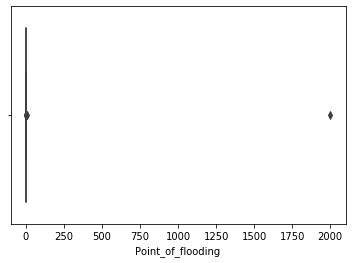

In [613]:
sns.boxplot('Point_of_flooding', data = df)

#### Exploratory Analysis for Manifestations feature

In [614]:
#print(df.Manifestations.unique())
print(df['Manifestations'].value_counts(dropna=False))
#df['Manifestations'].mode()

 0.0    133
 1.0      6
-1.0      1
Name: Manifestations, dtype: int64


In [615]:
df.loc[(df.Manifestations == -1.0),'Manifestations']=1.0
print(df['Manifestations'].value_counts(dropna=False))

0.0    133
1.0      7
Name: Manifestations, dtype: int64


In [616]:
df['Manifestations'] = pd.to_numeric(df['Manifestations'],errors='coerce')
print(df['Manifestations'].value_counts(dropna=False))

0.0    133
1.0      7
Name: Manifestations, dtype: int64


#### Exploratory Analysis for Defect_in_the_network_of_trolleybuses feature

In [617]:
#print(df.Defect_in_the_network_of_trolleybuses.unique())
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))
#Defect_in_the_network_of_trolleybuses feature has 118 occurances as 0.0 and 17 occurances as YES. 2 missing values
#and 1 occurances of 3.0, -8.0 and 2.0. -8 can be considered as outlier.

#This feature also looks categorical and we can represent it as 0.0, YES as 1.0, missing value is replaced with mode
#0.0 is considered as NO and rest of the values as YES
print(df['Defect_in_the_network_of_trolleybuses'].mode)

df.loc[(df.Defect_in_the_network_of_trolleybuses == ' '),'Defect_in_the_network_of_trolleybuses']=' 0.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' YES'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' 2.0'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' 3.0'),'Defect_in_the_network_of_trolleybuses']=' 1.0'
#Replace outlier with mode 
df.loc[(df.Defect_in_the_network_of_trolleybuses == ' -8.0'),'Defect_in_the_network_of_trolleybuses']=' 0.0'
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))

 0.0     118
 1.0      17
           2
 3.0       1
 -8.0      1
 2.0       1
Name: Defect_in_the_network_of_trolleybuses, dtype: int64
<bound method Series.mode of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
135     1.0
136        
137     0.0
138     0.0
139     0.0
Name: Defect_in_the_network_of_trolleybuses, Length: 140, dtype: object>
 0.0    121
 1.0     19
Name: Defect_in_the_network_of_trolleybuses, dtype: int64


In [618]:
df['Defect_in_the_network_of_trolleybuses'] = pd.to_numeric(df['Defect_in_the_network_of_trolleybuses'],errors='coerce')
print(df['Defect_in_the_network_of_trolleybuses'].value_counts(dropna=False))

0.0    121
1.0     19
Name: Defect_in_the_network_of_trolleybuses, dtype: int64


#### Exploratory Analysis for  Tree_on_the_road feature

In [619]:
#print(df.Tree_on_the_road.unique())
print(df['Tree_on_the_road'].value_counts(dropna=False))
df['Tree_on_the_road'] = pd.to_numeric(df['Tree_on_the_road'],errors='coerce')
#Tree_on_the_road feature has values 0 and 1 so it's categorical by nature and values are 0 and 1
#so we dont need to create any new feature/s for this.

0.0    134
1.0      6
Name: Tree_on_the_road, dtype: int64


#### Exploratory Analysis for Semaphore_off feature

In [620]:
#print(df.Semaphore_off.unique())
print(df['Semaphore_off'].value_counts(dropna=False))
#print(df['Semaphore_off'].mode())
#Semaphore_off has 125 occurances on 0, 12 occurance of YES, 1 occurance of 2.0, 4.0 and 1 missing value. 
#The feature looks like categorical in nature if we consider 0.0 ~ N0, 1.0 ~ YES so we can replace missing value with 
#mode and convert it to numerical with 0.0 as 0.0 and rest of the values as 1.0 and we don't need to create any new 
#feature/column

 0.0    125
 1.0     12
          1
 2.0      1
 4.0      1
Name: Semaphore_off, dtype: int64


In [621]:
df.loc[(df.Semaphore_off == ' '),'Semaphore_off']=' 0.0'
df.loc[(df.Semaphore_off == ' YES'),'Semaphore_off']=' 1.0'
df.loc[(df.Semaphore_off == ' 2.0'),'Semaphore_off']=' 1.0'
df.loc[(df.Semaphore_off == ' 4.0'),'Semaphore_off']=' 1.0'
#print(df.Semaphore_off.unique())

In [622]:
df['Semaphore_off'] = pd.to_numeric(df['Semaphore_off'],errors='coerce')
#print(df.Semaphore_off.unique())

#### Exploratory Analysis for Intermittent_Semaphore feature

In [623]:
#print(df.Intermittent_Semaphore.unique())
print(df['Intermittent_Semaphore'].value_counts(dropna=False))
#Transform values to numeric values
df['Intermittent_Semaphore'] = pd.to_numeric(df['Intermittent_Semaphore'],errors='coerce')
#Intermittent_Semaphore feature has values 0 and 1 so it's categorical by nature and values are 0 and 1
#so we dont need to create any new feature/s for this.

0.0    138
1.0      2
Name: Intermittent_Semaphore, dtype: int64


# Feature Subset Selection - In progress

In [624]:
df.isnull().sum()

Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          0
Running_over                             0
Fire_vehicles                            0
Occurrence_involving_freight             0
Incident_involving_dangerous_freight     0
Lack_of_electricity                      0
Fire                                     0
Point_of_flooding                        0
Manifestations                           0
Defect_in_the_network_of_trolleybuses    0
Tree_on_the_road                         0
Semaphore_off                            0
Intermittent_Semaphore                   0
Slowness_in_traffic_percent              0
Immobilized_bus_zero                     0
Immobilized_bus_one                      0
Immobilized_bus_twoOrMore                0
Broken_Truck_zero                        0
Broken_Truck_one                         0
Broken_Truc

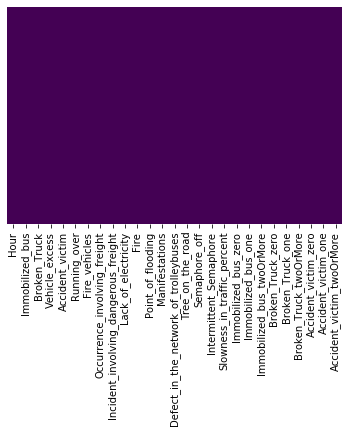

In [625]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [627]:
df.isnull().any().any()

False

In [628]:
df.describe()

,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,...,Slowness_in_traffic_percent,Immobilized_bus_zero,Immobilized_bus_one,Immobilized_bus_twoOrMore,Broken_Truck_zero,Broken_Truck_one,Broken_Truck_twoOrMore,Accident_victim_zero,Accident_victim_one,Accident_victim_twoOrMore
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.335714,0.864286,0.035714,0.442857,0.100000,0.007143,0.007143,0.007143,0.071429,0.007143,...,9.980714,0.742857,0.192857,0.064286,0.478571,0.314286,0.207143,0.671429,0.235714,0.092857
std,0.652728,1.094201,0.186243,0.722420,0.301077,0.084515,0.084515,0.084515,0.258464,0.084515,...,4.323583,0.438628,0.395959,0.246142,0.501334,0.465898,0.406714,0.471380,0.425968,0.291274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.950000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,23.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


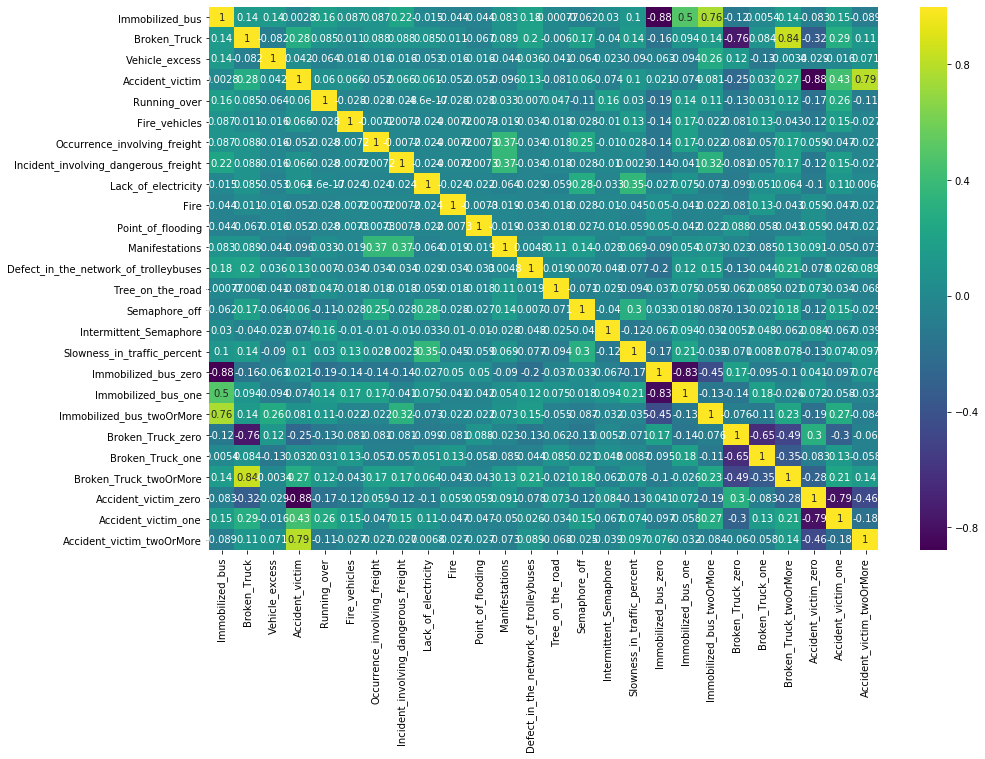

In [629]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [630]:
print(df.corr())

                                       Immobilized_bus  Broken_Truck  \
Immobilized_bus                               1.000000      0.144834   
Broken_Truck                                  0.144834      1.000000   
Vehicle_excess                                0.137381     -0.081953   
Accident_victim                               0.002833      0.276806   
Running_over                                  0.157414      0.085168   
Fire_vehicles                                 0.086631      0.010558   
Occurrence_involving_freight                  0.086631      0.088353   
Incident_involving_dangerous_freight          0.217043      0.088353   
Lack_of_electricity                          -0.015230      0.085400   
Fire                                         -0.043781      0.010558   
Point_of_flooding                            -0.044003     -0.066650   
Manifestations                                0.083145      0.088676   
Defect_in_the_network_of_trolleybuses         0.180261      0.20

# Linear Regression using scikit-learn - Peding